<center>
    <h1>Toxic Comment Classification</h1>
    <h5>Detect toxic content to improve online conversations</h5>
    <h5>Dataset - Quora Insincere Questions Classification</h5>

</center>

<h3> Brief Problem Statement </h3>
<h5>
    An existential issue for any major website nowadays is how to handle toxic and divisive content.
    A key challenge is to get rid of toxic/insincere comments/text -- those founded upon false premises, or that intend to make a statement rather than look for helpful answers.
</h5>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('../input/quora-insincere-questions-classification/train.csv')
test = pd.read_csv('../input/quora-insincere-questions-classification/test.csv')

In [3]:
train.shape, test.shape

((1306122, 3), (375806, 2))

In [4]:
train.head()

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0


In [5]:
test.head()

,qid,question_text
0,0000163e3ea7c7a74cd7,Why do so many women become so rude and arroga...
1,00002bd4fb5d505b9161,When should I apply for RV college of engineer...
2,00007756b4a147d2b0b3,What is it really like to be a nurse practitio...
3,000086e4b7e1c7146103,Who are entrepreneurs?
4,0000c4c3fbe8785a3090,Is education really making good people nowadays?


Check for missing values

In [6]:
train.isnull().sum()

qid              0
question_text    0
target           0
dtype: int64

In [7]:
test.isnull().sum()

qid              0
question_text    0
dtype: int64

In [8]:
train['target'].value_counts()

0    1225312
1      80810
Name: target, dtype: int64

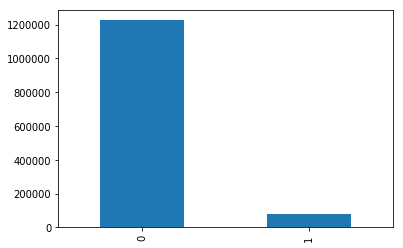

In [9]:
train['target'].value_counts().plot.bar()

By analyzing above data, we can say that **Data is Imbalanced** 

In [10]:
toxic = train[train['target'] == 1]
non_toxic = train[train['target'] == 0]

In [11]:
non_toxic.head()

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0


In [12]:
toxic.head()

,qid,question_text,target
22,0000e91571b60c2fb487,Has the United States become the largest dicta...,1
30,00013ceca3f624b09f42,Which babies are more sweeter to their parents...,1
110,0004a7fcb2bf73076489,If blacks support school choice and mandatory ...,1
114,00052793eaa287aff1e1,I am gay boy and I love my cousin (boy). He is...,1
115,000537213b01fd77b58a,Which races have the smallest penis?,1


Building n-grams for analyzing data

In [13]:
import nltk
from nltk.util import ngrams
from nltk.corpus import stopwords
import re

REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def build_ngrams(text, ngram):
    text = text.lower()
    text = REPLACE_BY_SPACE_RE.sub(' ', text)
    text = BAD_SYMBOLS_RE.sub('', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) 
    tokenize = nltk.word_tokenize(text)
    return list(ngrams(tokenize, ngram))

In [14]:
print(build_ngrams('I am testing ngrams', 1))
print(build_ngrams('I am testing ngrams', 2))
print(build_ngrams('I am testing ngrams', 3))

[('testing',), ('ngrams',)]
[('testing', 'ngrams')]
[]


In [15]:
def plot_horizontal_bar(data, title):
    plt.figure(figsize=(20, 20))
    freq = pd.DataFrame(sorted(data.items(), key=lambda x: x[1]), columns=['Word','Count'])
    sns.barplot(x='Count', y='Word', data=freq.sort_values(by="Count", ascending=True).tail(30))
    plt.title(title)
    plt.tight_layout()
    plt.show()

Creating One-grams, Bigrams, Trigrams

In [16]:
%%time
from collections import defaultdict

onegram_nontoxic_freq = defaultdict(int)
for sentence in non_toxic['question_text']:
    for word in build_ngrams(sentence, 1):
        onegram_nontoxic_freq[word] += 1
        

onegram_toxic_freq = defaultdict(int)
for sentence in toxic['question_text']:
    for word in build_ngrams(sentence, 1):
        onegram_toxic_freq[word] += 1
        
        
bigram_nontoxic_freq = defaultdict(int)
for sentence in non_toxic['question_text']:
    for word in build_ngrams(sentence, 2):
        bigram_nontoxic_freq[word] += 1
        

bigram_toxic_freq = defaultdict(int)
for sentence in toxic['question_text']:
    for word in build_ngrams(sentence, 2):
        bigram_toxic_freq[word] += 1
        
        

trigram_nontoxic_freq = defaultdict(int)
for sentence in non_toxic['question_text']:
    for word in build_ngrams(sentence, 3):
        trigram_nontoxic_freq[word] += 1
        

trigram_toxic_freq = defaultdict(int)
for sentence in toxic['question_text']:
    for word in build_ngrams(sentence, 3):
        trigram_toxic_freq[word] += 1

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:16: DeprecationWarning: generator 'ngrams' raised StopIteration
  app.launch_new_instance()


CPU times: user 14min 11s, sys: 2.94 s, total: 14min 14s
Wall time: 14min 14s


Plotting Top Frequency N-grams

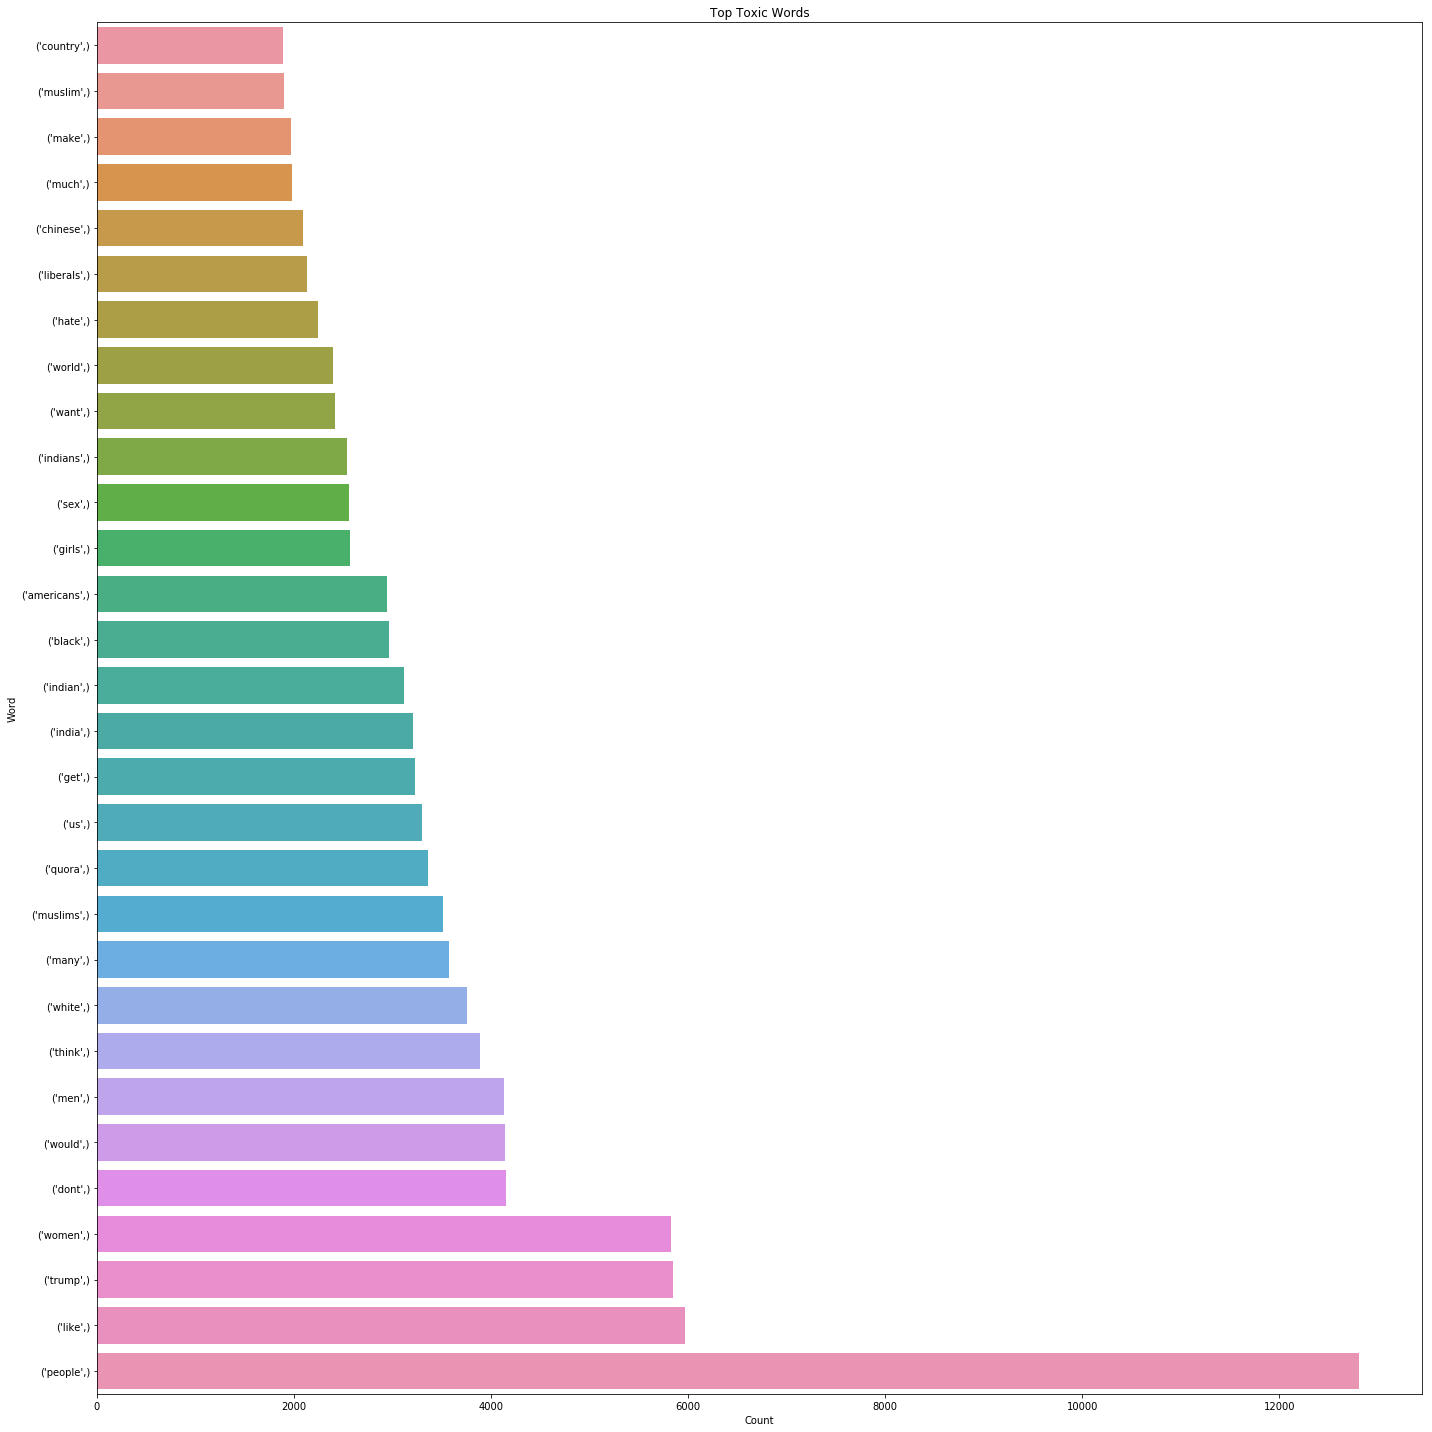

In [17]:
plot_horizontal_bar(onegram_toxic_freq, 'Top Toxic Words')

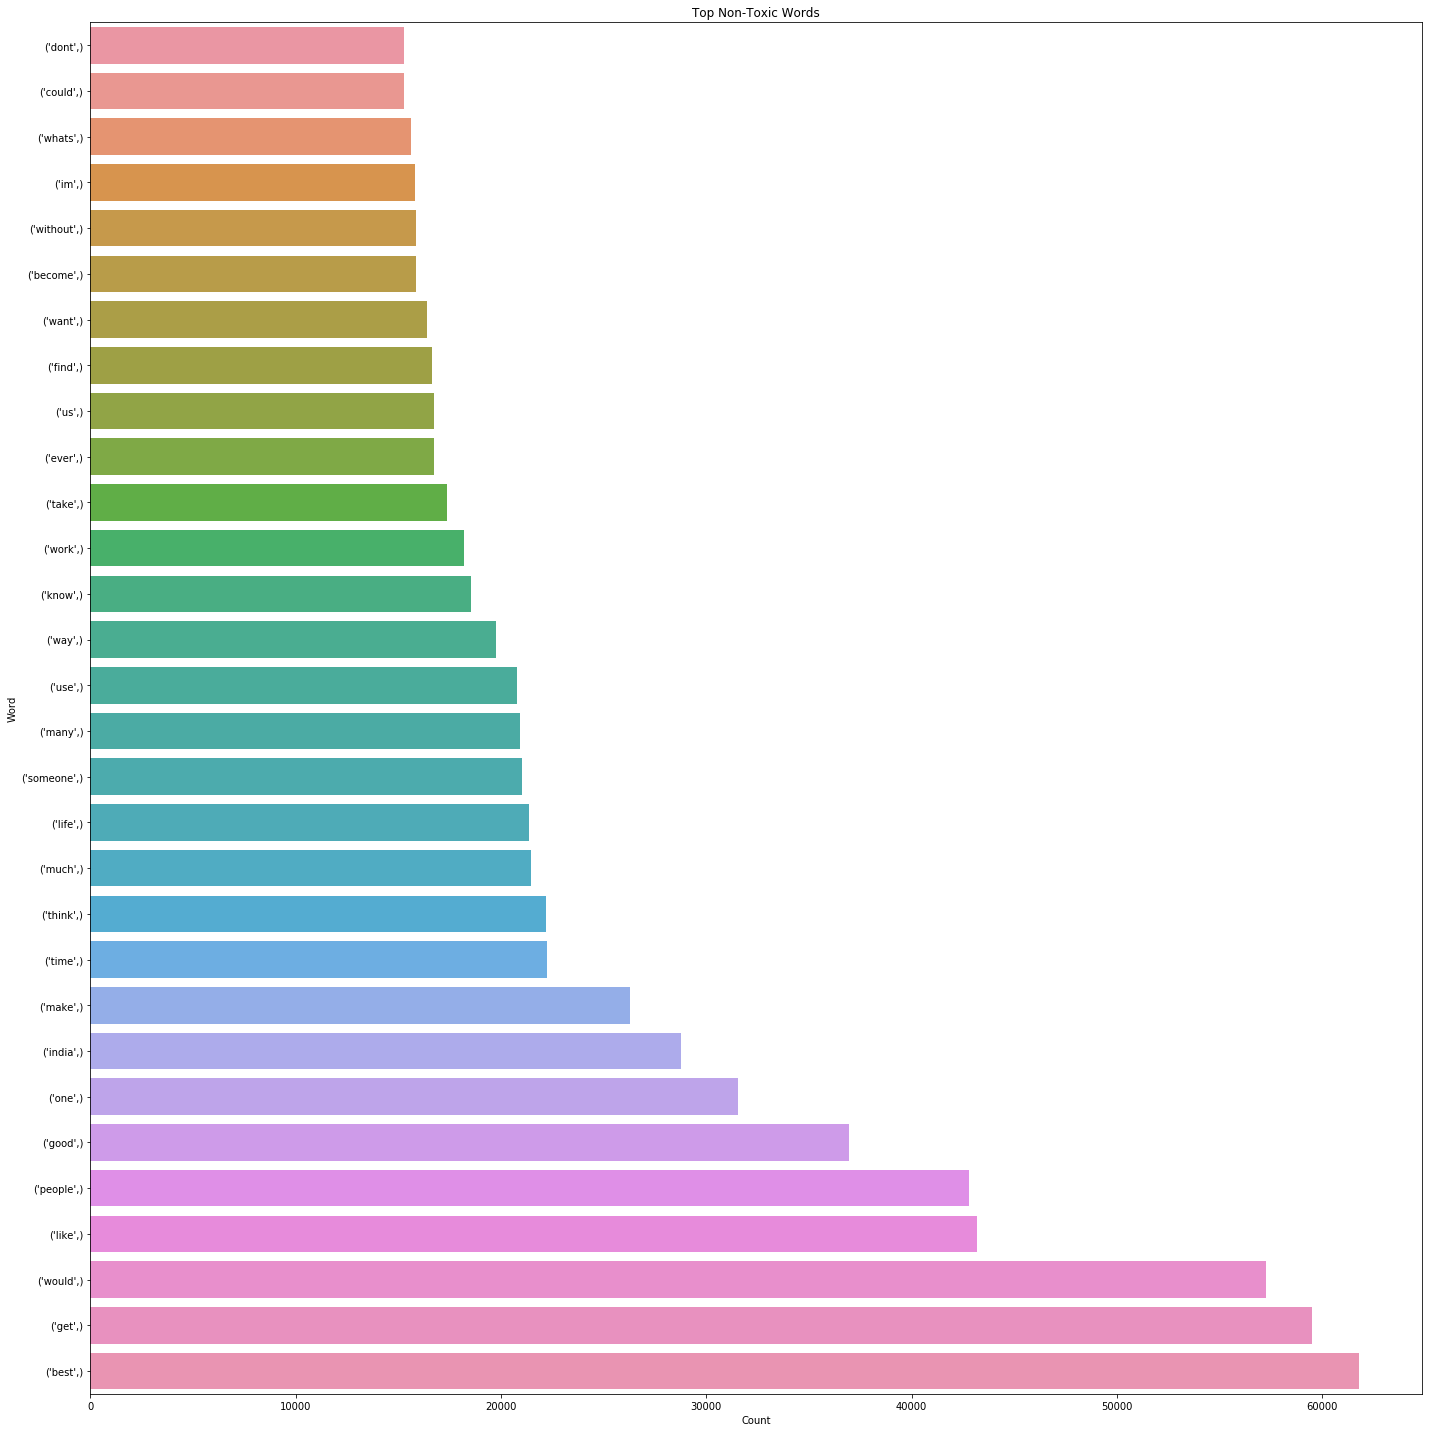

In [18]:
plot_horizontal_bar(onegram_nontoxic_freq, 'Top Non-Toxic Words')

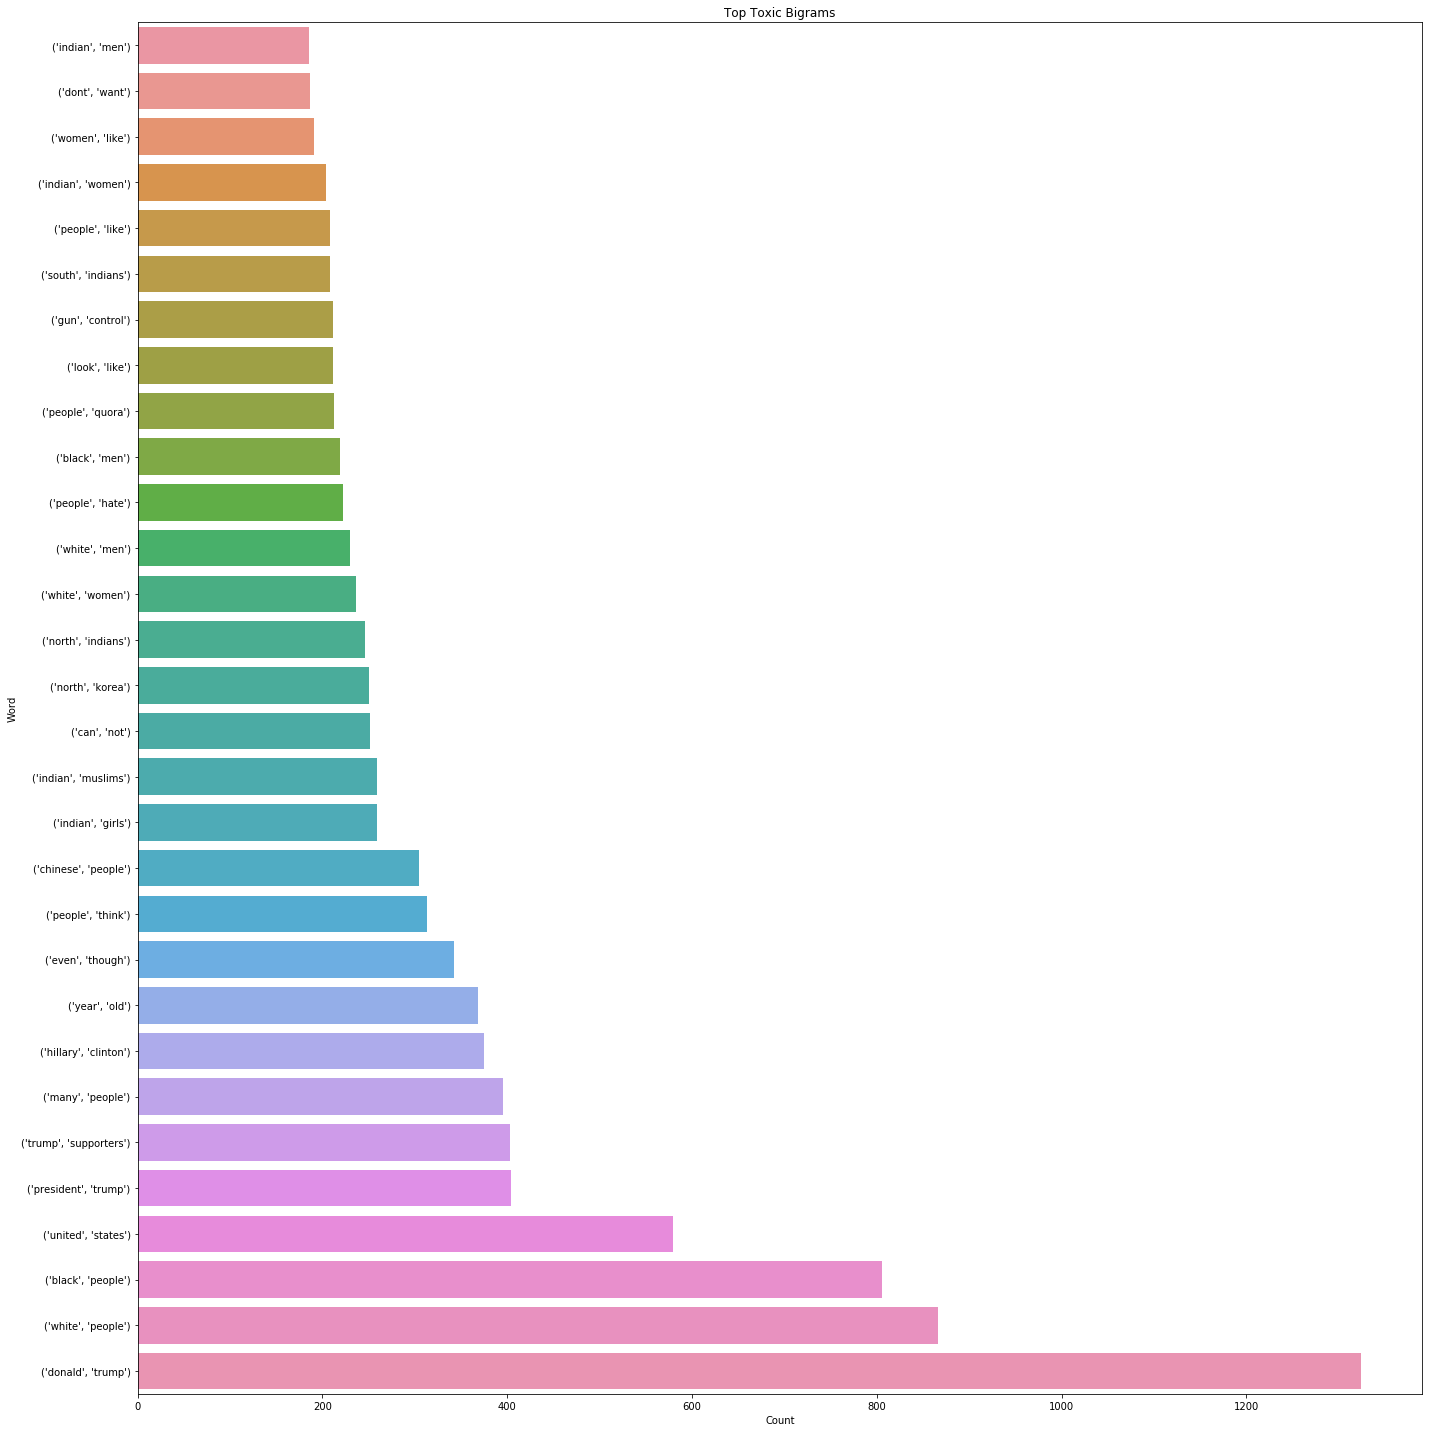

In [19]:
plot_horizontal_bar(bigram_toxic_freq, 'Top Toxic Bigrams')

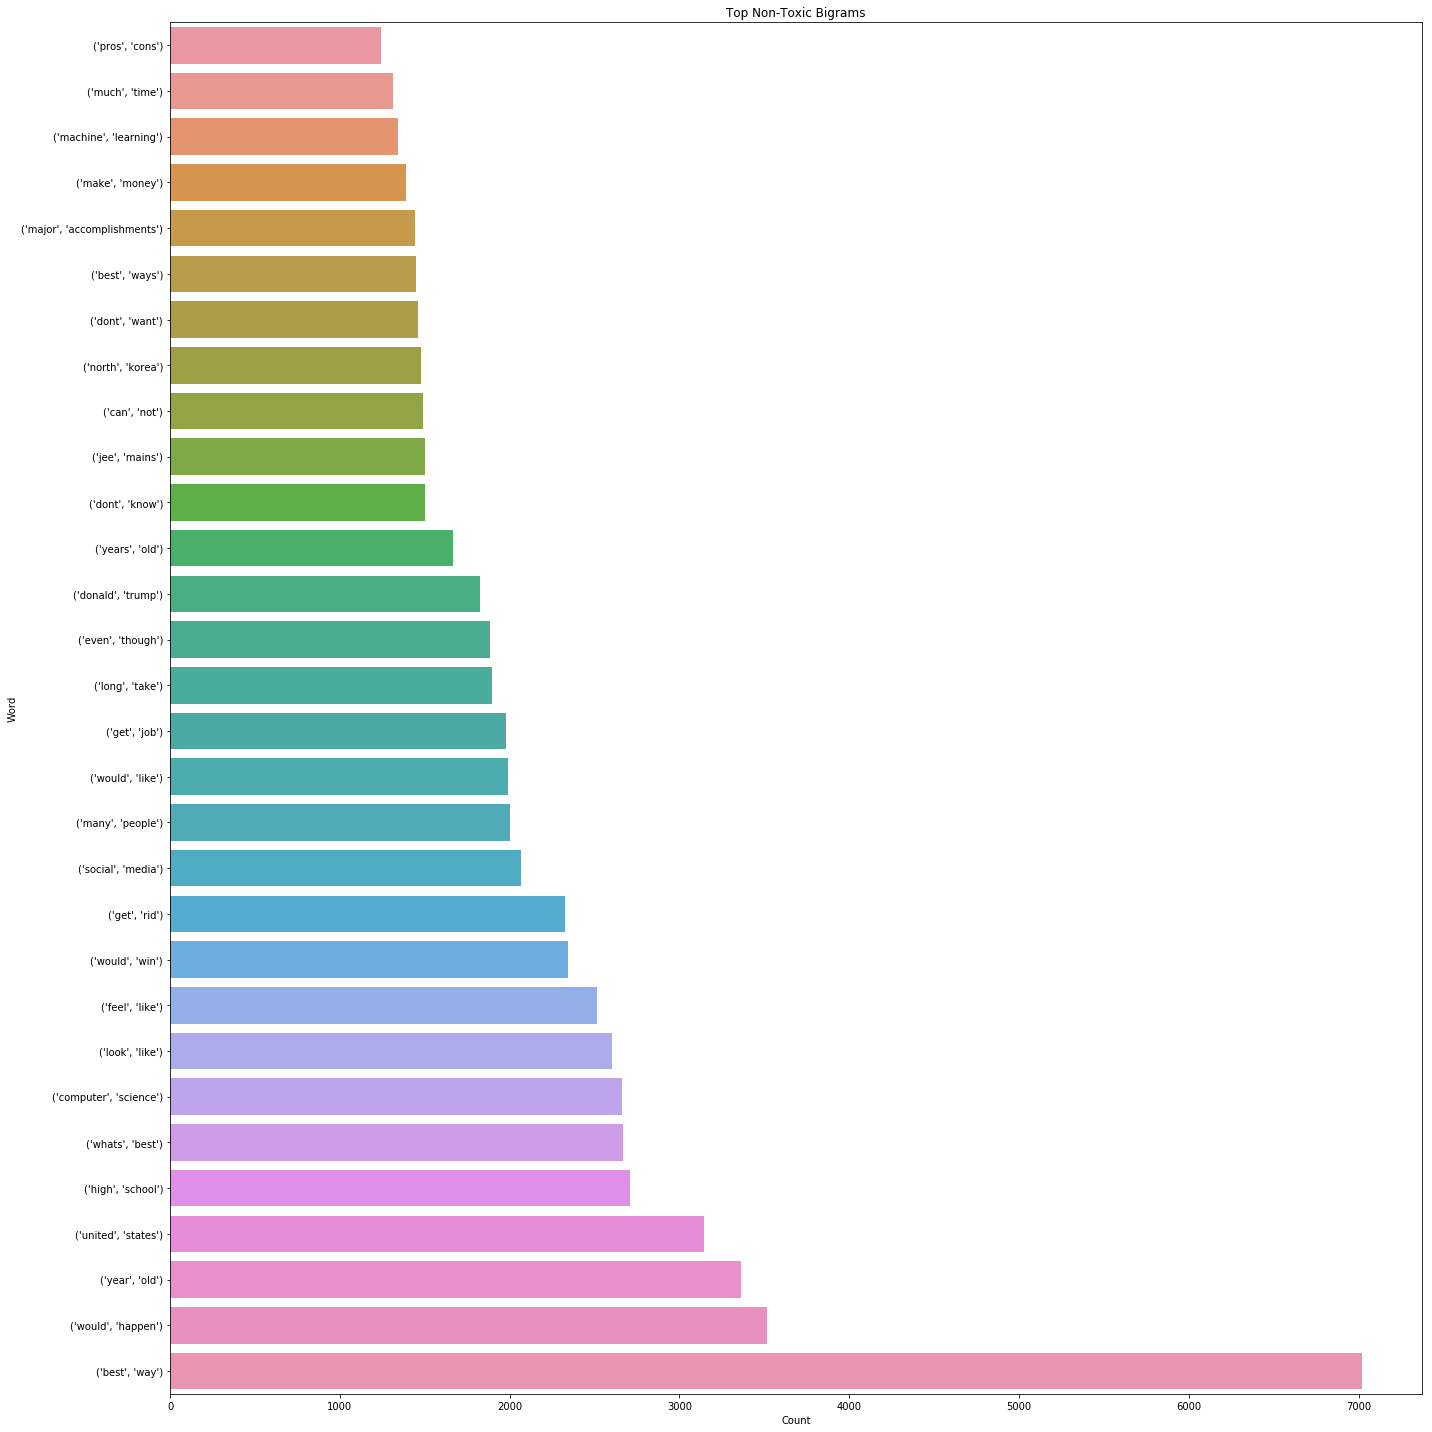

In [20]:
plot_horizontal_bar(bigram_nontoxic_freq, 'Top Non-Toxic Bigrams')

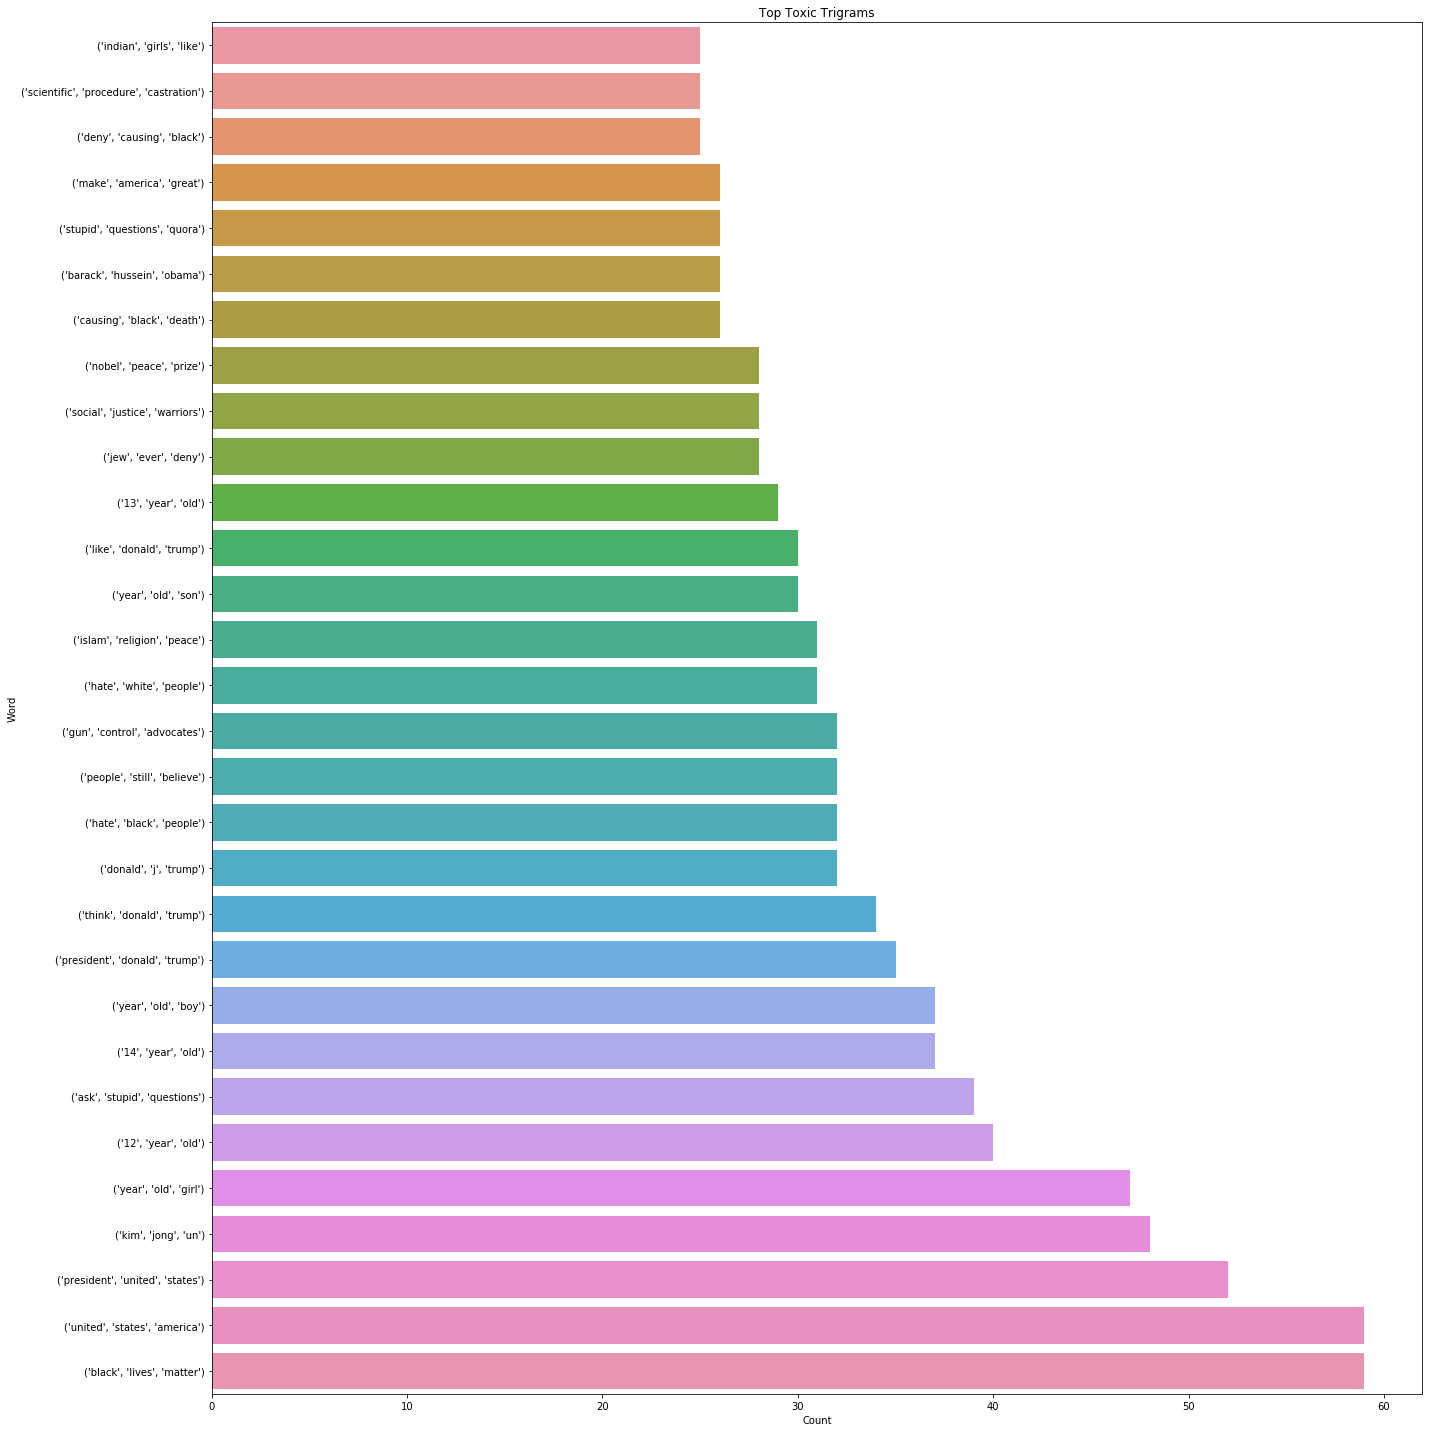

In [21]:
plot_horizontal_bar(trigram_toxic_freq, 'Top Toxic Trigrams')

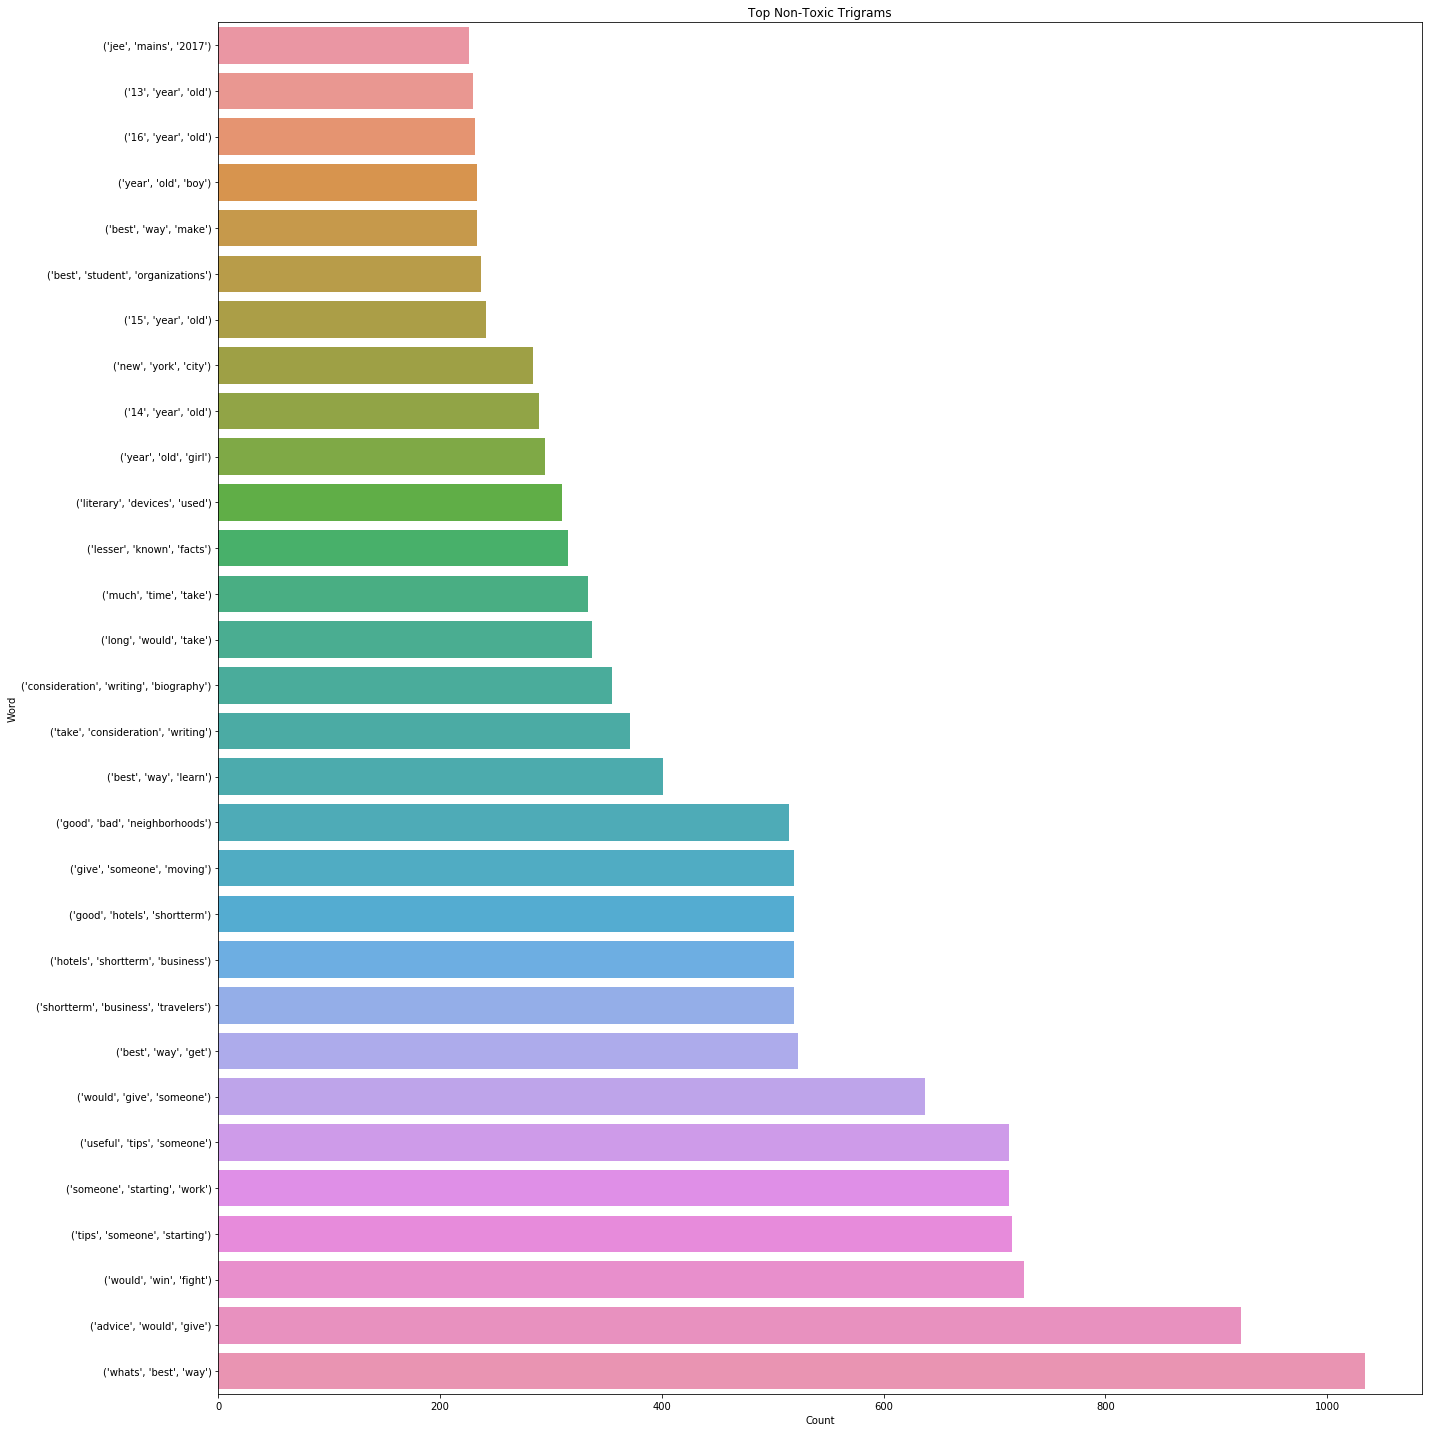

In [22]:
plot_horizontal_bar(trigram_nontoxic_freq, 'Top Non-Toxic Trigrams')

In [23]:
train['target'].value_counts()

0    1225312
1      80810
Name: target, dtype: int64

([<matplotlib.patches.Wedge at 0x7f7a84e98e10>,
 [Text(-1.0792863255716563, 0.2124641791785922, 'Non Toxic'),
  Text(1.0792863380043618, -0.21246411602229345, 'Toxic')],
 [Text(-0.5887016321299943, 0.11588955227923209, '93.8%'),
  Text(0.58870163891147, -0.11588951783034188, '6.2%')])

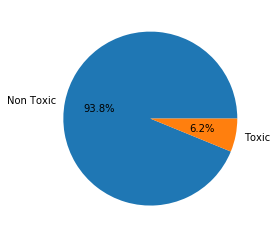

In [24]:
plt.pie(train['target'].value_counts().to_list(), labels=['Non Toxic', 'Toxic'], autopct='%1.1f%%')

After analyzing above, we can say that data is highly imbalanced. Imbalanced data is a scenario where the number of observations belonging to one class is significantly lower than those belonging to the other classes. Machine Learning algorithms tend to produce unsatisfactory classifiers when faced with imbalanced datasets.
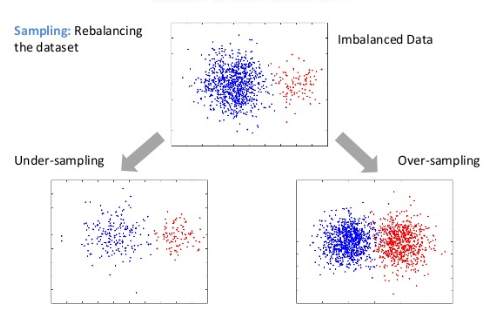

In [25]:
from sklearn.utils import resample
non_toxic = resample(non_toxic, replace=False, n_samples=1000001, random_state=25)
toxic = resample(toxic, replace=True, n_samples=120001, random_state=25)
train = pd.concat([non_toxic, toxic])

([<matplotlib.patches.Wedge at 0x7f7a84b6ab38>,
 [Text(-1.0382708372517986, 0.36330932896424434, 'Non Toxic'),
  Text(1.0382708117401902, -0.36330940187169186, 'Toxic')],
 [Text(-0.56632954759189, 0.19816872488958778, '89.3%'),
  Text(0.5663295336764673, -0.19816876465728647, '10.7%')])

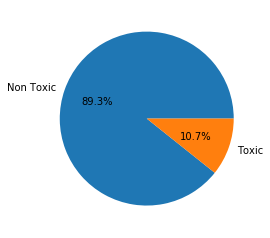

In [26]:
plt.pie(train['target'].value_counts().to_list(), labels=['Non Toxic', 'Toxic'], autopct='%1.1f%%')

In [27]:
train["num_chars"] = train["question_text"].apply(lambda x: len(str(x)))
test["num_chars"] = test["question_text"].apply(lambda x: len(str(x)))

train["num_words"] = train["question_text"].apply(lambda x: len(str(x).split()))
test["num_words"] = test["question_text"].apply(lambda x: len(str(x).split()))

train["num_unique_words"] = train["question_text"].apply(lambda x: len(set(str(x).split())))
test["num_unique_words"] = test["question_text"].apply(lambda x: len(set(str(x).split())))

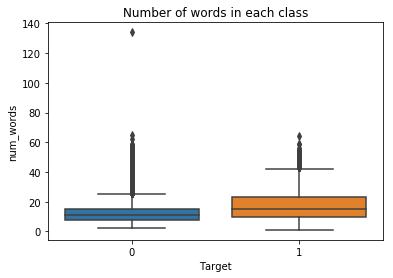

In [28]:
axes= sns.boxplot(x='target', y='num_words', data=train)
axes.set_xlabel('Target')
axes.set_title("Number of words in each class")
plt.show()

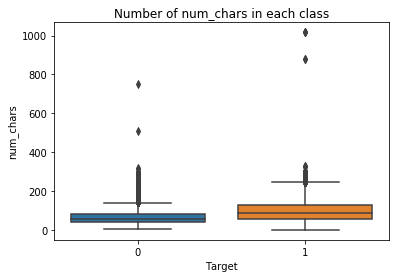

In [29]:
axes= sns.boxplot(x='target', y='num_chars', data=train)
axes.set_xlabel('Target')
axes.set_title("Number of num_chars in each class")
plt.show()

In [30]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

embed_size = 300
max_features = 50000
maxlen = 100

tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(train['question_text']))
train_X = tokenizer.texts_to_sequences(train['question_text'])
test_X = tokenizer.texts_to_sequences(test['question_text'])

train_X = pad_sequences(train_X, maxlen=maxlen)
test_X = pad_sequences(test_X, maxlen=maxlen)

word_index = tokenizer.word_index
unq_len = min(max_features, len(word_index))

Using TensorFlow backend.


In [31]:
def loadGlove(file_path):
    f = open(file_path, 'r')
    glove_embeddings_index = {}
    
    for line in f:
        lines = line.split(' ')
        word, coef = lines[0], np.asarray(lines[1: ], dtype='float32')
        glove_embeddings_index[word] = coef
        
    embedding_matrix = np.zeros((len(word_index) + 1, embed_size))

    for word, i in word_index.items():
        if i < max_features: 
            embedding_vector = glove_embeddings_index.get(word)
            if embedding_vector is not None: 
                embedding_matrix[i] = embedding_vector
    
    return embedding_matrix

In [32]:
embedding_matrix = loadGlove('../input/glove840b300dtxt/glove.840B.300d.txt')

In [33]:
from keras.layers import Embedding

embedding_layer = Embedding(len(word_index) + 1,
                            embed_size,
                            weights=[embedding_matrix],
                            input_length=maxlen,
                            trainable=False)